In [2]:
from warnings import simplefilter 
simplefilter(action='ignore', category=FutureWarning)
import random
from  keras.preprocessing.image import save_img
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image
import io
import os
import yaml
from Util import *
from AdversarialAttack import *
from IPython import display
%matplotlib inline


In [3]:
#Global configuration
attackMode = 'Raw' #Raw: means without defense, Detection: With adversarial exmaples detection
queryBudgets = 1000 #Query Budgets
NumberOfTest = 100 #Number of test images
random.seed(42) #Set random seeds

house_finch: 0.92557055
brambling: 0.0027899502
indigo_bunting: 0.0023966078
goldfinch: 0.0016583949
junco: 0.0013930714
fig: 0.00046557895


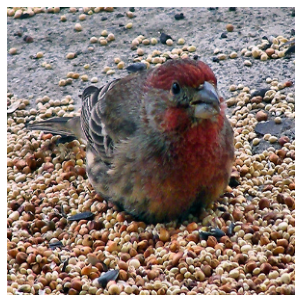

In [5]:
#Prepare test images
File,ImgPre = ResultSave('BO-OPT','./Result/Inception')#Result saving folder and filename
ImgSet=[]
if os.path.isfile(File):
    HISTORY = LOAD(File)#Load Checkpoint
else:
    HISTORY = []
StartPoint=len(HISTORY)
for i in range(NumberOfTest):
    ImgSet.append(randomimg(mode=attackMode))
display_images(ImgSet[-1].img)


In [4]:
#Run the experiments
noiseGenerator = 'perlin'#Options: perlin; gabor; BICU; BILI; CLUSTER; NN
constraint = 'linf'#norm: l2; linf
for i in range(len(HISTORY),NumberOfTest):
    print("round "+str(i),end=': ')
    image = ImgSet[i]
    if i<StartPoint:
        continue
    with tf.device('/GPU:0'): 
        timehistory,adversarial = bayesian_attack(image,max_query=queryBudgets,
                                                             noise=noiseGenerator,constraint=constraint)
    if not adversarial is None:
        np.save(ImgPre+str(i),adversarial)
    print('Attack result: L2:{0}, Linf:{1}'.format(image.maxl2,image.maxlinf))
    History=[image.historyl2,image.historylinf,timehistory]
    HISTORY.append(History)
    SAVE(File,HISTORY)
        

round 0: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:6.741556644439697, Linf:0.458823561668396
round 1: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:5.804913520812988, Linf:0.4274477958679199
round 2: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:3.9657351970672607, Linf:0.301960825920105
round 3: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.765445232391357, Linf:0.37254902720451355
round 4: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:5.15264892578125, Linf:0.3686274588108063
round 5: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.225074291229248, Linf:0.24117648601531982
round 6: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.834384918212891, Linf:0.3764706254005432
round 7: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.354671001434326, Linf:0.3176470696926117
round 8: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:5.324892997741699, Linf:0.44705885648727417
round 9: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:4.496218681335449, Linf:0.3450973629951477
round 10: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:4.584508419036865, Linf:0.3294117748737335
round 11: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.855916500091553, Linf:0.41960784792900085
round 12: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.041400909423828, Linf:0.3294033408164978
round 13: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:5.445915699005127, Linf:0.38431379199028015
round 14: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:6.080046653747559, Linf:0.43137258291244507
round 15: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.318827152252197, Linf:0.458823561668396
round 16: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:4.059078216552734, Linf:0.2862745225429535
round 17: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.4229512214660645, Linf:0.41960787773132324
round 18: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.9032464027404785, Linf:0.38431376218795776
round 19: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.619952201843262, Linf:0.40784314274787903
round 20: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:6.219943523406982, Linf:0.4274510145187378
round 21: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.5503764152526855, Linf:0.40783482789993286
round 22: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.142001152038574, Linf:0.30980393290519714
round 23: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:2.913280963897705, Linf:0.1960773468017578
round 24: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:3.5338714122772217, Linf:0.27843135595321655
round 25: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:2.435413360595703, Linf:0.1725490242242813
round 26: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:7.047514915466309, Linf:0.5019607543945312
round 27: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:4.999207973480225, Linf:0.3921568989753723
round 28: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:2.5442545413970947, Linf:0.18627451360225677
round 29: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.346230506896973, Linf:0.32156863808631897
round 30: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.528037071228027, Linf:0.4274510145187378
round 31: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.129511833190918, Linf:0.29411765933036804
round 32: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:5.037429332733154, Linf:0.3529411852359772
round 33: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.3304362297058105, Linf:0.4745098352432251
round 34: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.007740497589111, Linf:0.2862745225429535
round 35: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:5.56113862991333, Linf:0.3999895751476288
round 36: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.014554023742676, Linf:0.30977684259414673
round 37: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.3152520656585693, Linf:0.24705886840820312
round 38: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:7.065695285797119, Linf:0.47450685501098633
round 39: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:6.292555809020996, Linf:0.43529415130615234
round 40: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.5933051109313965, Linf:0.2549019753932953
round 41: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:9.436382293701172, Linf:0.65625
round 42: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.713501930236816, Linf:0.4549019932746887
round 43: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:5.489015579223633, Linf:0.40000003576278687
round 44: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:5.425905227661133, Linf:0.4078431725502014
round 45: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.640931606292725, Linf:0.48235297203063965
round 46: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:4.796470642089844, Linf:0.3686274588108063
round 47: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.580344200134277, Linf:0.3764706254005432
round 48: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:4.400595188140869, Linf:0.3176470696926117
round 49: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.231919288635254, Linf:0.3882352411746979
round 50: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:6.0133585929870605, Linf:0.43529415130615234
round 51: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.557150840759277, Linf:0.32156863808631897
round 52: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.718530178070068, Linf:0.4078431725502014
round 53: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.108541488647461, Linf:0.4313720166683197
round 54: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:5.336260795593262, Linf:0.38823533058166504
round 55: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.020135402679443, Linf:0.2862745225429535
round 56: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.948812484741211, Linf:0.34117648005485535
round 57: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:0.4157769978046417, Linf:0.021078431978821754
round 58: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.296192169189453, Linf:0.3176470696926117
round 59: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:4.313886642456055, Linf:0.3882352113723755
round 60: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:6.118980407714844, Linf:0.4235294461250305
round 61: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.3430328369140625, Linf:0.3607843220233917
round 62: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.827083587646484, Linf:0.34901905059814453
round 63: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.508088111877441, Linf:0.384313702583313
round 64: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.963089942932129, Linf:0.43137258291244507
round 65: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:6.385220050811768, Linf:0.43528997898101807
round 66: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.492220401763916, Linf:0.29411765933036804
round 67: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:4.6832756996154785, Linf:0.2901960611343384
round 68: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:7.7807464599609375, Linf:0.609375
round 69: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.259908199310303, Linf:0.3137255012989044
round 70: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:3.8195128440856934, Linf:0.2980377674102783
round 71: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:6.1681389808654785, Linf:0.458823561668396
round 72: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.744137763977051, Linf:0.4431372880935669
round 73: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:6.5769219398498535, Linf:0.46274513006210327
round 74: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:6.478511810302734, Linf:0.4941176772117615
round 75: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.002552032470703, Linf:0.4470587968826294
round 76: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:4.756446838378906, Linf:0.3529411852359772
round 77: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.310236930847168, Linf:0.3019607961177826
round 78: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:5.107966423034668, Linf:0.4274477958679199
round 79: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:4.584348201751709, Linf:0.3490196168422699
round 80: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.252115726470947, Linf:0.27450981736183167
round 81: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.085483551025391, Linf:0.36470603942871094
round 82: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.275653839111328, Linf:0.3136896789073944
round 83: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:8.750069618225098, Linf:0.6015625
round 84: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:7.0093255043029785, Linf:0.45881929993629456
round 85: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.614994525909424, Linf:0.34117645025253296
round 86: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.8673415184021, Linf:0.4744511842727661
round 87: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:4.789245128631592, Linf:0.3450980484485626
round 88: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.0751266479492188, Linf:0.1882353127002716
round 89: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:4.961118221282959, Linf:0.34117648005485535
round 90: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:3.206782102584839, Linf:0.2196078598499298
round 91: 

  0%|          | 0/1000 [00:00<?, ?it/s]

Attack result: L2:2.3555660247802734, Linf:0.17843137681484222
round 92: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
Attack result: L2:6.577496528625488, Linf:0.458823561668396
round 93: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.032344341278076, Linf:0.43529415130615234
round 94: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:3.1616692543029785, Linf:0.20588237047195435
round 95: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:3.874042510986328, Linf:0.2666666805744171
round 96: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
Attack result: L2:4.305127143859863, Linf:0.39607667922973633
round 97: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
Attack result: L2:5.998759746551514, Linf:0.46274513006210327
round 98: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:6.692897796630859, Linf:0.46666663885116577
round 99: 

  0%|          | 0/1000 [00:00<?, ?it/s]

inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
inf happened
Attack result: L2:5.5478692054748535, Linf:0.38822972774505615


Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/server2080ti/anaconda3/envs/Adv/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth
(17, 2)
1
5.130307674407959
0.3803921639919281


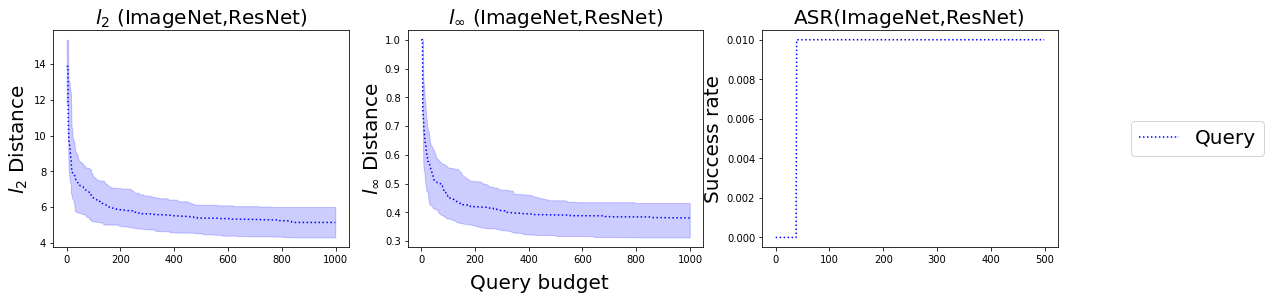

In [5]:
#Preview the results
from Visualization import Result
Valid=100
fontsize=20
vis = Result(filename = File,pref=ImgPre,color='b',label="Query",marker=None,linestyle=":")
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(18,4))

vis.Plot(0,Valid,1000,ax1)
ax1.set_title('$l_2$ (ImageNet,ResNet)',size=fontsize)
ax1.set_ylabel('$l_2$ Distance',size=fontsize)


vis.Plot(1,Valid,1000,ax2)
ax2.set_title('$l_\infty$ (ImageNet,ResNet)',size=fontsize)
ax2.set_ylabel('$l_\infty$ Distance',size=fontsize)

infT = 16.01/255

vis.ASR(1,Valid,500,infT,ax3)


ax3.set_title('ASR(ImageNet,ResNet)',size=fontsize)
ax3.set_ylabel('Success rate',size=fontsize)



fig.text(0.5, -0.00, 'Query budget', ha='center', va='center',fontsize=fontsize)

handles, labels = ax3.get_legend_handles_labels()

plt.legend(handles=handles,labels=labels,fontsize=fontsize,bbox_to_anchor=(1.7,0.5 ), loc=7, borderaxespad=0.)

In [6]:
print(File)

./Result/MNIST/BO-OPT.dat
